In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('transformed_features.csv')

In [5]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.390979,-0.054142,0.569875,0.608032,3.748798,0.193173,-0.016745,-0.214749,-0.249818,1.072820,...,0.707226,0.167883,-0.518800,1.451156,-0.156591,0.262873,0.001385,0.002666,-0.014743,BENIGN
1,-2.913872,-0.069280,0.888999,1.462739,8.890884,0.517774,-0.061181,1.115094,1.970735,-2.750156,...,0.214982,-0.017288,-2.543196,2.112990,-0.649356,0.563292,0.027271,0.000827,-0.020609,BENIGN
2,-2.449933,-0.055862,0.606199,0.704919,4.325623,0.227464,-0.021853,-0.068832,-0.002663,0.652011,...,0.656176,0.150637,-0.732336,1.525840,-0.208474,0.294626,0.004077,0.002472,-0.015138,BENIGN
3,-2.914726,-0.069319,0.889864,1.464659,8.896365,0.515998,-0.061352,1.113251,1.971161,-2.746190,...,0.218626,-0.013960,-2.531800,2.114137,-0.646487,0.561665,0.027086,0.000837,-0.020353,BENIGN
4,-1.538079,0.080213,-0.489878,0.320055,-0.525546,0.755004,0.100991,0.729182,-1.141042,-0.572120,...,-0.239837,-0.782527,0.348497,0.860799,-0.178431,-0.246678,-0.026624,0.000898,0.022294,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.304647,-0.047668,0.476010,0.385633,2.175687,-0.164691,-0.015810,-0.779535,-0.897969,2.692285,...,0.614358,0.472443,0.588583,0.787838,0.261563,-0.053321,-0.018226,0.001904,-0.001623,BENIGN
2522358,-2.301679,-0.047573,0.474787,0.383356,2.155614,-0.166606,-0.015741,-0.782345,-0.900963,2.698772,...,0.617024,0.477510,0.587569,0.788610,0.262761,-0.053720,-0.018305,0.001906,-0.000911,BENIGN
2522359,-2.301010,-0.047552,0.474510,0.382820,2.151095,-0.167023,-0.015725,-0.782962,-0.901615,2.700166,...,0.617562,0.478571,0.587203,0.788784,0.262980,-0.053784,-0.018320,0.001906,-0.000755,BENIGN
2522360,-2.135438,-0.041386,0.357036,0.207592,1.803137,0.264473,0.006410,-0.297039,-0.613434,0.952894,...,0.657317,0.305405,1.751218,-0.857851,0.304591,-0.201020,-0.011825,0.002121,0.053010,BENIGN


In [6]:
# 이진분류를 위한 balanced 데이터셋 만들기
normal_traffic = df.loc[df['Attack Type'] == 'BENIGN']
intrusions = df.loc[df['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)#intrusion과 동일한 수의 nomal_traffic을 추출.replace = False는 복원추출x(동일샘플중복x)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)#이진분류를 위함. Benign
balanced_data = ids_data.sample(n = 15000)

print(balanced_data['Attack Type'].value_counts())

Attack Type
0    7501
1    7499
Name: count, dtype: int64


In [10]:
# Split data features (X) and target (y)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_bc = balanced_data.drop('Attack Type', axis = 1)
y_bc = balanced_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm1 = joblib.load('optimized_svm_model.pkl')

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

#svm1 모델 테스트 데이터로 확인하기


test_score = svm1.score(X_test_bc, y_test_bc)
print(f'\nTest data accuracy: {test_score}')




Support Vector Machine Model 1

Cross-validation scores: 0.9995555555555555, 0.9995555555555555, 1.0, 0.9995555555555555, 1.0

Mean cross-validation score: 1.00

Test data accuracy: 0.0


과적합???

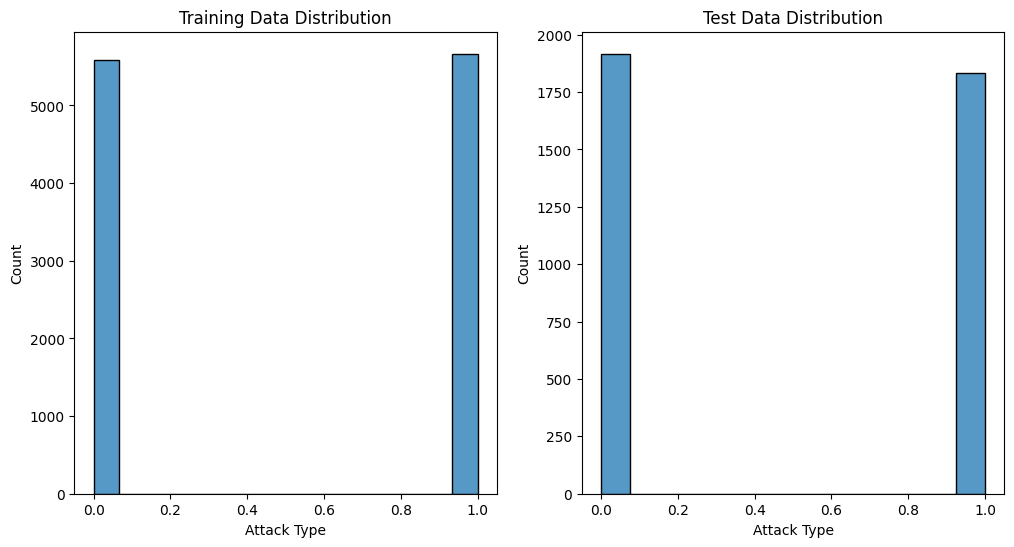

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 데이터와 테스트 데이터 분포 비교
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train_bc, kde=False)
plt.title('Training Data Distribution')

plt.subplot(1, 2, 2)
sns.histplot(y_test_bc, kde=False)
plt.title('Test Data Distribution')

plt.show()
